In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

import plotly
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import math
import pyvis

from pyvis.network import Network
from collections import defaultdict

In [2]:
nxgraph = nx.read_gexf('graph.gexf')

basic_graph = Network(width='100%', bgcolor="#222222", font_color="white", notebook=True)
basic_graph.barnes_hut()
basic_graph.from_nx(nxgraph)
for node in basic_graph.nodes:
    node['label'] = nxgraph.node[node['id']]['label']
    node['title'] = node['id'] + ' ' + node['label'] 

for edge in basic_graph.edges:
    edge['selectionWidth'] = 15
basic_graph.show('visualizations/basic_graph.html')

Узнаем количество вершин

In [3]:
len(nxgraph.nodes)

38

Сформируем матрицу смежности и список смежности

In [4]:
g_matrix = defaultdict(dict) # adjacency matrix
g_list = defaultdict(set) # adjacency matrix

for user_id in nxgraph.nodes:
    for user_id2 in nxgraph.nodes:
        g_matrix[user_id][user_id2] = 0
        
for edge in nxgraph.edges():
    g_list[edge[0]].add(edge[1])
    g_list[edge[1]].add(edge[0])
    g_matrix[edge[0]][edge[1]] = 1
    g_matrix[edge[1]][edge[0]] = 1

Ради красоты отображения матрицы смежности используем **pandas**

In [5]:
# use pandas for beautiful matrix visualization

pd_matrix = pd.DataFrame(g_matrix)
pd_matrix.head()

,114913,488329,10015045,11627865,12080386,13496102,21365955,28315548,36175307,41580584,...,177123098,194682140,216953513,225812577,272342301,334779665,373044930,374868070,439306088,486163600
10015045,0,0,0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,1,0,0,0
102945985,0,0,0,0,0,0,0,0,1,1,...,0,1,1,0,0,0,1,0,0,0
114913,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11627865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119301334,0,0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0


Уже по визуализации видно, что граф распадается на компоненты связности, но давайте убедимся в этом

In [6]:
nodes_list = list(nxgraph.nodes())
used = dict.fromkeys(nodes_list, False)
current_component = []
shrinked_graph = []

def dfs(cur_node):
    used[cur_node] = True
    current_component.append(cur_node)
    for neighbour in g_list[cur_node]:
        if not used[neighbour]:
            dfs(neighbour)


components_count = 0
for node in nodes_list:
    if not used[node]:
        components_count += 1
        current_component = []
        dfs(node)
        if len(current_component) > len(shrinked_graph):
            shrinked_graph = current_component
        print('Количество вершин в компоненте: ', len(current_component))
        for node in current_component:
            print(nxgraph.nodes[node]['label'], end=' | ')
        print(end='\n\n')
        
        
        

print('Количество компонент = ', components_count)

Количество вершин в компоненте:  7
Светлана Дюрягина | Ольга Ренёва | Юра Малыгин | Алексей Ренёв | Мария Канивец | Вася Шевчук | Андрей Карпин | 

Количество вершин в компоненте:  26
Даниил Гайдайчук | Анастасия Берлина | Егор Глушков | Татьяна Зубахина | Егор Будлов | Глеб Щербаков | Василий Васильев | Александр Родионов | Олег Моисеев | Аня Прокошкина | Артем Лысенко | Александра Гаврилова | Владислав Купряков | Александр Гоготов | Григор Хачатрян | Студсовет Пм-Пу | Артем Паскевич | Ирина Цеханович | Александр Тимофеев | Данил Балавнев | Кирилл Жадан | Владислав Герасимов | Маша Голубева | Жора Григорьев | Никита Поваляев | Дмитрий Севастюк | 

Количество вершин в компоненте:  1
Мария Боруха | 

Количество вершин в компоненте:  1
Сергей Кузьмин | 

Количество вершин в компоненте:  1
Лена Аксенова | 

Количество вершин в компоненте:  1
Николай Фролов | 

Количество вершин в компоненте:  1
Артём Пак | 

Количество компонент =  7


Стоит сделать заметку, что компоненты, состоящие из одной вершины в визуализации не отображались

Построим гистограмму распределения степеней вершин

In [7]:
count_nodes_by_degree_dict = defaultdict(int)
for node in shrinked_graph:
    count_nodes_by_degree_dict[len(g_list[node])] += 1

for degree in sorted(count_nodes_by_degree_dict):
    print(degree, '\t: ', count_nodes_by_degree_dict[degree])

3 	:  1
4 	:  1
8 	:  3
9 	:  1
10 	:  4
11 	:  3
12 	:  3
13 	:  1
14 	:  4
16 	:  1
17 	:  1
18 	:  1
19 	:  1
20 	:  1


<BarContainer object of 14 artists>

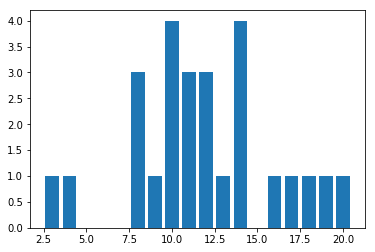

In [8]:
plt.bar(count_nodes_by_degree_dict.keys(), count_nodes_by_degree_dict.values())

In [9]:
nodes_count = 0
degree_sum = 0
for key, value in count_nodes_by_degree_dict.items():
    nodes_count += value
    degree_sum += value * key
    
average_degree = degree_sum / nodes_count
print('Средняя степень вершины: ', average_degree)

Средняя степень вершины:  11.846153846153847


Построим гистрограмму вероятности степени вершины

<BarContainer object of 14 artists>

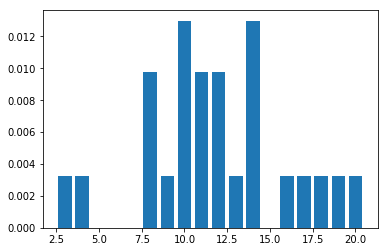

In [10]:
for i in count_nodes_by_degree_dict:
    count_nodes_by_degree_dict[i] /= degree_sum
    
plt.bar(count_nodes_by_degree_dict.keys(), count_nodes_by_degree_dict.values())

Посчитаем расстояние между каждой парой вершин с помощью алгоритма Флойда O(n^3)

In [11]:
dist = defaultdict(lambda: defaultdict(lambda: 99999999))
for node in shrinked_graph:
    dist[node][node] = 0
    for v in g_list[node]:
        dist[node][v] = 1
        dist[v][node] = 1

for k in shrinked_graph:
    for i in shrinked_graph:
        for j in shrinked_graph:
            dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

Получили матрицу расстоянию между вершинами

In [12]:
pd_distance_matrix = pd.DataFrame(dist)
pd_distance_matrix

,10015045,67446082,41580584,177123098,36175307,78602687,157062074,119301334,373044930,216953513,...,82892660,58555820,59477024,102945985,50952050,194682140,134070307,164285180,28315548,169387028
10015045,0,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,3,2,2,2
102945985,2,1,1,2,1,1,2,2,1,1,...,1,1,1,0,2,1,2,2,2,2
119301334,1,2,2,1,1,2,1,0,1,2,...,2,2,2,2,1,2,2,2,3,2
134070307,3,2,2,2,2,2,2,2,2,2,...,2,2,1,2,2,2,0,2,2,2
137252115,2,1,2,1,1,1,1,2,1,1,...,2,2,2,2,2,2,2,2,2,2
157062074,1,2,2,1,2,1,0,1,1,2,...,1,2,1,2,2,2,2,2,3,2
164285180,2,2,2,1,1,2,2,2,1,2,...,2,1,1,2,1,2,2,0,3,1
169387028,2,2,1,1,1,2,2,2,1,1,...,2,2,1,2,1,1,2,1,2,0
177123098,1,2,2,0,1,2,1,1,1,1,...,2,1,2,2,1,1,2,1,2,1
194682140,2,2,1,1,1,2,2,2,1,1,...,1,2,1,1,1,0,2,2,2,1


Вычислим **диаметр** и **радиус** графа

Определения:

*Эксцентриситетом вершины называется расстояние до самой дальней вершины графа.*

*Радиусом графа называется минимальный эксцентриситет среди всех вершин графа*

*Диаметром графа - это наибольшее расстояние между всеми парами вершин графа*

In [13]:
# pd_distance_matrix.max() - массив максимумов в столбцах
maxes_in_columns = pd_distance_matrix.max()
diameter = maxes_in_columns.max()
radius = maxes_in_columns.min()

print('Диаметр графа = ', diameter)
print('Радиус графа = ', radius)

Диаметр графа =  3
Радиус графа =  2


Найдём **центральные** и **периферийные** вершины

Справка:

*Центральной вершиной графа является вершина чей эксцентриситет равен радиусу графа.*

*Периферийной вершиной графа является вершина чей эксцентриситет равен диаметру графа.*

In [14]:
center_nodes = []
side_nodes = []
for i in maxes_in_columns.keys():
    if maxes_in_columns[i] == radius:
        center_nodes.append(i)
    if maxes_in_columns[i] == diameter:
        side_nodes.append(i)
        
print('Центральные вершины')
print(center_nodes)
print('\nПериферийные вершины')
print(side_nodes)

Центральные вершины
['67446082', '177123098', '36175307', '78602687', '373044930', '216953513', '225812577', '374868070', '137252115', '64004147', '76411897', '82892660', '58555820', '59477024', '102945985', '50952050', '194682140', '169387028']

Периферийные вершины
['10015045', '41580584', '157062074', '119301334', '80659889', '134070307', '164285180', '28315548']


Изобразим граф с выделенными Центральными вершинами (жёлтым) и Периферийными вершинами (красным)

In [15]:
central_side_nodes_graph = Network(width='100%', bgcolor="#222222", font_color="white", notebook=True)
central_side_nodes_graph.barnes_hut()
central_side_nodes_graph.from_nx(nxgraph)
for node in central_side_nodes_graph.nodes:
    node['label'] = nxgraph.node[node['id']]['label']
    node['title'] = node['id'] + ' ' + node['label']
    if node['id'] in center_nodes:
        node['color'] = 'yellow'
    if node['id'] in side_nodes:
        node['color'] = 'red'
        
for edge in central_side_nodes_graph.edges:
    edge['selectionWidth'] = 15
central_side_nodes_graph.show('visualizations/central_side_nodes_graph.html')

Рассчитаем среднюю длину пути между вершинами

In [16]:
sum_dist = 0
dist_count = 0

for i in dist:
    for j in dist[i]:
        sum_dist += dist[i][j]
        dist_count += 1

print('Средняя длина пути = ', sum_dist / dist_count)

Средняя длина пути =  1.485207100591716


Вычислим меры сходства узлов графа

Common Neighbors (число общих соседей): 𝑠(𝑥, 𝑦) = |𝑁(𝑥) ⋂ 𝑁(𝑦)|

In [17]:
common_neighbours_similarity = defaultdict(dict)

for i in shrinked_graph:
    for j in shrinked_graph:
        common_neighbours_similarity[i][j] = len(g_list[i] & g_list[j])

common_neighbours_similarity_matrix = pd.DataFrame(common_neighbours_similarity)
print('Common Neighbors')
common_neighbours_similarity_matrix

Common Neighbors


,10015045,67446082,225812577,374868070,64004147,137252115,177123098,216953513,50952050,41580584,...,78602687,59477024,194682140,102945985,157062074,119301334,80659889,134070307,164285180,28315548
10015045,10,2,8,5,5,7,6,2,6,2,...,3,8,5,6,5,5,5,0,3,1
102945985,6,7,11,8,8,7,5,7,8,5,...,5,9,6,12,4,2,4,3,4,3
119301334,5,3,4,4,3,5,7,5,4,5,...,4,6,5,2,5,8,5,1,4,0
134070307,0,4,3,3,2,3,1,4,2,2,...,4,1,2,3,2,1,1,4,1,2
137252115,7,5,8,8,7,10,5,5,5,3,...,6,7,5,7,4,5,4,3,3,3
157062074,5,7,6,3,5,4,6,6,6,5,...,5,5,5,4,10,5,6,2,3,0
164285180,3,4,6,4,4,3,5,7,7,5,...,3,5,6,4,3,4,4,1,8,0
169387028,5,2,7,5,3,4,6,5,8,5,...,2,7,7,6,3,4,4,1,5,1
177123098,6,5,8,7,6,5,14,8,9,7,...,5,11,6,5,6,7,5,1,5,1
194682140,5,5,7,5,6,5,6,8,9,8,...,4,9,11,6,5,5,5,2,6,1


Jaccard’s Coefficient (мера Жаккара) 𝑠(𝑥, 𝑦) = |𝑁(𝑥) ⋂ 𝑁(𝑦)| / |𝑁(𝑥) ⋃ 𝑁(𝑦)|

In [18]:
jaccard_similarity = defaultdict(dict)

for i in shrinked_graph:
    for j in shrinked_graph:
        jaccard_similarity[i][j] = len(g_list[i] & g_list[j]) / len(g_list[i] | g_list[j])

jaccard_similarity_matrix = pd.DataFrame(jaccard_similarity)
print('Jaccard’s Coefficient ')
jaccard_similarity_matrix

Jaccard’s Coefficient 


,10015045,67446082,225812577,374868070,64004147,137252115,177123098,216953513,50952050,41580584,...,78602687,59477024,194682140,102945985,157062074,119301334,80659889,134070307,164285180,28315548
10015045,1.000000,0.100000,0.400000,0.312500,0.263158,0.538462,0.333333,0.083333,0.333333,0.111111,...,0.166667,0.421053,0.312500,0.375000,0.333333,0.384615,0.384615,0.000000,0.200000,0.083333
102945985,0.375000,0.411765,0.578947,0.533333,0.444444,0.466667,0.238095,0.333333,0.444444,0.294118,...,0.277778,0.450000,0.352941,1.000000,0.222222,0.111111,0.250000,0.230769,0.250000,0.250000
119301334,0.384615,0.176471,0.181818,0.266667,0.157895,0.384615,0.466667,0.263158,0.222222,0.384615,...,0.266667,0.315789,0.357143,0.111111,0.384615,1.000000,0.454545,0.090909,0.333333,0.000000
134070307,0.000000,0.333333,0.157895,0.250000,0.125000,0.272727,0.058824,0.250000,0.125000,0.166667,...,0.363636,0.050000,0.153846,0.230769,0.166667,0.090909,0.090909,1.000000,0.090909,0.400000
137252115,0.538462,0.294118,0.400000,0.615385,0.411765,1.000000,0.263158,0.238095,0.263158,0.176471,...,0.400000,0.350000,0.312500,0.466667,0.250000,0.384615,0.285714,0.272727,0.200000,0.300000
157062074,0.333333,0.466667,0.272727,0.166667,0.263158,0.250000,0.333333,0.300000,0.333333,0.333333,...,0.312500,0.227273,0.312500,0.222222,1.000000,0.384615,0.500000,0.166667,0.200000,0.000000
164285180,0.200000,0.250000,0.300000,0.266667,0.222222,0.200000,0.294118,0.411765,0.466667,0.384615,...,0.187500,0.250000,0.461538,0.250000,0.200000,0.333333,0.333333,0.090909,1.000000,0.000000
169387028,0.357143,0.105263,0.350000,0.333333,0.150000,0.266667,0.352941,0.250000,0.533333,0.357143,...,0.111111,0.368421,0.538462,0.400000,0.187500,0.307692,0.307692,0.083333,0.416667,0.090909
177123098,0.333333,0.238095,0.333333,0.388889,0.272727,0.263158,1.000000,0.363636,0.473684,0.411765,...,0.250000,0.550000,0.315789,0.238095,0.333333,0.466667,0.294118,0.058824,0.294118,0.062500
194682140,0.312500,0.277778,0.318182,0.294118,0.315789,0.312500,0.315789,0.421053,0.562500,0.615385,...,0.222222,0.473684,1.000000,0.352941,0.312500,0.357143,0.357143,0.153846,0.461538,0.076923


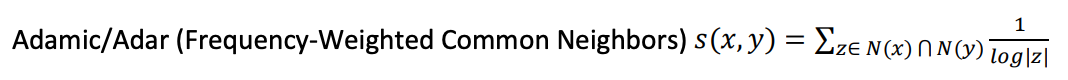

In [19]:
frequency_common_neighbors_similarity = defaultdict(lambda: defaultdict(lambda: float(0)))

for i in shrinked_graph:
    for j in shrinked_graph:
        if i == j:
            frequency_common_neighbors_similarity[i][j] = 1
            continue
        intersect = g_list[i] & g_list[j]
        
        for node in intersect:
            frequency_common_neighbors_similarity[i][j] += 1 / math.log(len(g_list[node]))

frequency_common_neighbors_similarity_matrix = pd.DataFrame(frequency_common_neighbors_similarity)
frequency_common_neighbors_similarity_matrix.fillna(0, inplace=True)
print('Adamic/Adar (Frequency-Weighted Common Neighbors) Coefficient ')
frequency_common_neighbors_similarity_matrix

Adamic/Adar (Frequency-Weighted Common Neighbors) Coefficient 


,10015045,67446082,225812577,374868070,64004147,137252115,177123098,216953513,50952050,41580584,...,78602687,59477024,194682140,102945985,157062074,119301334,80659889,134070307,164285180,28315548
10015045,1.000000,0.750841,3.248170,1.853567,1.853567,2.666785,2.430196,0.718546,2.328221,0.673431,...,1.170532,3.203055,1.847323,2.287862,2.091560,1.967547,1.967547,0.000000,1.052355,0.360674
102945985,2.287862,2.653944,4.274189,3.024791,3.024791,2.622362,1.853567,2.659759,3.019741,1.822343,...,1.857988,3.486247,2.200279,1.000000,1.482720,0.673431,1.405311,1.121751,1.428817,1.129468
119301334,1.967547,1.114079,1.531764,1.398331,1.019408,1.832625,2.747818,1.877740,1.398331,1.832625,...,1.548373,2.313524,1.777254,0.673431,1.973900,1.000000,1.920944,0.345976,1.431278,0.000000
134070307,0.000000,1.467727,1.121751,1.114771,0.735848,1.114771,0.345976,1.467727,0.698932,0.698932,...,1.467727,0.345976,0.698932,1.121751,0.698932,0.345976,0.352956,1.000000,0.352956,0.768794
137252115,2.666785,1.865611,3.101771,2.968338,2.589415,1.000000,1.814376,1.833317,1.759005,1.019408,...,2.285303,2.633838,1.759005,2.622362,1.475740,1.832625,1.486649,1.114771,1.052355,1.129468
157062074,2.091560,2.697285,2.443028,1.096817,1.910035,1.475740,2.510170,2.325368,2.271485,1.845958,...,1.901330,1.956638,1.790587,1.482720,1.000000,1.973900,2.359804,0.698932,1.065688,0.000000
164285180,1.052355,1.506226,2.269888,1.454784,1.492893,1.052355,1.909904,2.725007,2.679892,1.860430,...,1.103797,1.909904,2.239354,1.428817,1.065688,1.431278,1.405311,0.352956,1.000000,0.000000
169387028,1.847323,0.686764,2.662426,1.893927,1.034105,1.413028,2.310959,1.867458,3.098210,1.822343,...,0.686764,2.745254,2.579202,2.238388,1.065688,1.431278,1.405311,0.352956,1.784234,0.360674
177123098,2.430196,1.950803,3.248170,2.642333,2.216806,1.814376,1.000000,3.207693,3.616460,2.704777,...,1.982668,4.429677,2.214124,1.853567,2.510170,2.747818,2.022919,0.345976,1.909904,0.360674
194682140,1.847323,1.814093,2.624317,1.759005,2.161434,1.759005,2.214124,3.032874,3.380298,2.987759,...,1.435170,3.429772,1.000000,2.200279,1.790587,1.777254,1.784234,0.698932,2.239354,0.360674


Preferential Attachment 𝑠(𝑥, 𝑦) = |𝑁(𝑥)| × |𝑁(𝑦)|

In [20]:
preferential_attachment_similarity = defaultdict(dict)

for i in shrinked_graph:
    for j in shrinked_graph:
        preferential_attachment_similarity[i][j] = len(g_list[i]) * len(g_list[j])

preferential_attachment_similarity_matrix = pd.DataFrame(preferential_attachment_similarity)
print('Preferential Attachment Similarity ')
preferential_attachment_similarity_matrix

Preferential Attachment Similarity 


,10015045,67446082,225812577,374868070,64004147,137252115,177123098,216953513,50952050,41580584,...,78602687,59477024,194682140,102945985,157062074,119301334,80659889,134070307,164285180,28315548
10015045,100,120,180,110,140,100,140,160,140,100,...,110,170,110,120,100,80,80,40,80,30
102945985,120,144,216,132,168,120,168,192,168,120,...,132,204,132,144,120,96,96,48,96,36
119301334,80,96,144,88,112,80,112,128,112,80,...,88,136,88,96,80,64,64,32,64,24
134070307,40,48,72,44,56,40,56,64,56,40,...,44,68,44,48,40,32,32,16,32,12
137252115,100,120,180,110,140,100,140,160,140,100,...,110,170,110,120,100,80,80,40,80,30
157062074,100,120,180,110,140,100,140,160,140,100,...,110,170,110,120,100,80,80,40,80,30
164285180,80,96,144,88,112,80,112,128,112,80,...,88,136,88,96,80,64,64,32,64,24
169387028,90,108,162,99,126,90,126,144,126,90,...,99,153,99,108,90,72,72,36,72,27
177123098,140,168,252,154,196,140,196,224,196,140,...,154,238,154,168,140,112,112,56,112,42
194682140,110,132,198,121,154,110,154,176,154,110,...,121,187,121,132,110,88,88,44,88,33


Для вершин графа рассчитаем нормализованные метрики центральности 

Сначала нормализованные метрики по степени и по близости

In [21]:
centrality = defaultdict(dict)
for node in shrinked_graph:
    centrality['degree'][node] = len(g_list[node]) / (len(shrinked_graph) - 1)
    centrality['closeness'][node] = (len(shrinked_graph) - 1) / pd_distance_matrix[node].sum()

print('Degree and Closeness centrality')
degree_centrality_matrix = pd.DataFrame(centrality)
degree_centrality_matrix

Degree and Closeness centrality


,degree,closeness
10015045,0.40,0.609756
102945985,0.48,0.657895
119301334,0.32,0.581395
134070307,0.16,0.531915
137252115,0.40,0.625000
157062074,0.40,0.609756
164285180,0.32,0.581395
169387028,0.36,0.609756
177123098,0.56,0.694444
194682140,0.44,0.641026


Посчитаем меру посредничества (в основном bfs + что-то вроде *динамики*)

In [22]:
from collections import deque

shortest_path_membership_count = defaultdict(lambda: 0)
# ATTENTION, THIS WORKS FOR ABOUT A MINUTE !
for i in shrinked_graph:
    for j in shrinked_graph:
        
        node_parents = defaultdict(list)
        dist_to_node = {i : 0}
        q = deque()
        q.append(i)
        while q:
            cur_node = q.popleft()
            for v in g_list[cur_node]:
                if not v in dist_to_node:
                    dist_to_node[v] = dist_to_node[cur_node] + 1
                    q.append(v)
                if dist_to_node[v] == dist_to_node[cur_node] + 1:
                    node_parents[v].append(cur_node)
        
        cur_membership = defaultdict(lambda: 0)
        cur_membership[j] = 1
        q.append(j)
        while q:
            cur_node = q.popleft()
            for v in node_parents[cur_node]:
                if not v in cur_membership:
                    q.append(v)
                cur_membership[v] += cur_membership[cur_node]
        for t in cur_membership:
            if t != i and t != j:
                shortest_path_membership_count[t] += cur_membership[t] / cur_membership[i]

Нормализуем меру посредничества

In [23]:
normalized_shortest_path_membership_count = {}

for i in shrinked_graph:
    if not i in shortest_path_membership_count:
        normalized_shortest_path_membership_count[i] = 0
        centrality['betweeness'][i] = normalized_shortest_path_membership_count[i]
        
for i in shortest_path_membership_count:
    normalized_shortest_path_membership_count[i] = shortest_path_membership_count[i] / (((len(shrinked_graph) - 1) * (len(shrinked_graph) - 2)) / 2) 
    centrality['betweeness'][i] = normalized_shortest_path_membership_count[i]

pd.DataFrame(centrality)

,degree,closeness,betweeness
10015045,0.40,0.609756,0.029131
102945985,0.48,0.657895,0.023510
119301334,0.32,0.581395,0.006730
134070307,0.16,0.531915,0.001407
137252115,0.40,0.625000,0.016113
157062074,0.40,0.609756,0.019474
164285180,0.32,0.581395,0.005410
169387028,0.36,0.609756,0.007055
177123098,0.56,0.694444,0.059342
194682140,0.44,0.641026,0.010249


Найдем метрику центральности по собственному вектору  
Собственные вектор ищем с помощью power iteration

In [24]:
from numpy import linalg as LA
import numpy as np

shrinked_graph_matrix = defaultdict(dict)
for i in shrinked_graph:
    for j in shrinked_graph:
        if j in g_list[i]:
            shrinked_graph_matrix[i][j] = 1
        else:
            shrinked_graph_matrix[i][j] = 0

cur_id = 0
from_node_to_index = {}
from_index_to_node = {}
for node in shrinked_graph:
    from_node_to_index[node] = cur_id
    from_index_to_node[cur_id] = node
    cur_id += 1

    
real_g_matrix = [[0] * len(shrinked_graph) for i in range(len(shrinked_graph))]
for node in shrinked_graph:
    for v in g_list[node]:
        real_g_matrix[from_node_to_index[node]][from_node_to_index[v]] = 1
        
        
def eigenvalue(A, v):
    Av = A.dot(v)
    return v.dot(Av)

def power_iteration(A):
    n, d = A.shape

    v = np.ones(d) / np.sqrt(d)
    ev = eigenvalue(A, v)

    while True:
        Av = A.dot(v)
        v_new = Av / np.linalg.norm(Av)

        ev_new = eigenvalue(A, v_new)
        if np.abs(ev - ev_new) < 0.01:
            break

        v = v_new
        ev = ev_new

    return ev_new, v_new

        
np_shrinked_matrix = np.array(real_g_matrix)

eigen_values, eigen_vector = power_iteration(np_shrinked_matrix)
        
pd.DataFrame(eigen_vector)

,0
0,0.151962
1,0.193515
2,0.268807
3,0.184230
4,0.211258
5,0.168786
6,0.210063
7,0.243985
8,0.225875
9,0.171819


In [25]:
for i in range(len(eigen_vector)):
    centrality['eigen_vector'][from_index_to_node[i]] = eigen_vector[i]
    
pd.DataFrame(centrality)

,degree,closeness,betweeness,eigen_vector
10015045,0.40,0.609756,0.029131,0.151962
102945985,0.48,0.657895,0.023510,0.201329
119301334,0.32,0.581395,0.006730,0.130634
134070307,0.16,0.531915,0.001407,0.069868
137252115,0.40,0.625000,0.016113,0.168786
157062074,0.40,0.609756,0.019474,0.154169
164285180,0.32,0.581395,0.005410,0.137253
169387028,0.36,0.609756,0.007055,0.152882
177123098,0.56,0.694444,0.059342,0.210063
194682140,0.44,0.641026,0.010249,0.192688


Найдем метрику edge betweeness

In [26]:
from collections import deque

shortest_path_edge_membership_count = defaultdict(lambda: 0)

# ATTENTION, THIS WORKS FOR ABOUT A MINUTE !
for i in shrinked_graph:
    for j in shrinked_graph:
        
        node_parents = defaultdict(list)
        dist_to_node = {i : 0}
        q = deque()
        q.append(i)
        while q:
            cur_node = q.popleft()
            for v in g_list[cur_node]:
                if not v in dist_to_node:
                    dist_to_node[v] = dist_to_node[cur_node] + 1
                    q.append(v)
                if dist_to_node[v] == dist_to_node[cur_node] + 1:
                    node_parents[v].append(cur_node)
                    
        cur_membership = defaultdict(lambda: 0)
        cur_membership[j] = 1
        cur_edge_membership = defaultdict(lambda: 0)
        q.append(j)
        while q:
            cur_node = q.popleft()
            for v in node_parents[cur_node]:
                if not v in cur_membership:
                    q.append(v)
                cur_edge_membership[(min(cur_node, v), max(cur_node, v))] += cur_membership[cur_node]
                cur_membership[v] += cur_membership[cur_node]
        for t in cur_edge_membership:
            shortest_path_edge_membership_count[t] += cur_edge_membership[t] / cur_membership[i]

In [27]:
edge_centrality = defaultdict(dict)
normalized_shortest_path_edge_membership_count = shortest_path_edge_membership_count
for i in normalized_shortest_path_edge_membership_count:
    normalized_shortest_path_edge_membership_count[i] = normalized_shortest_path_edge_membership_count[i] / (((len(shrinked_graph)) * (len(shrinked_graph) - 1)) / 2) 
    edge_centrality['betweenes'][i] = normalized_shortest_path_edge_membership_count[i]

pd.DataFrame(edge_centrality)

betweenes
10015045  119301334   0.014862
          157062074   0.014024
          177123098   0.018466
          216953513   0.034257
          36175307    0.022575
          373044930   0.020211
          41580584    0.021307
          67446082    0.024586
          78602687    0.021289
          80659889    0.014202
102945985 194682140   0.015644
          216953513   0.017348
          36175307    0.020635
          373044930   0.020635
          41580584    0.017158
          58555820    0.015309
          59477024    0.016474
          64004147    0.015678
          67446082    0.012874
          76411897    0.016943
          78602687    0.016882
          82892660    0.012012
119301334 157062074   0.012684
          177123098   0.015077
          225812577   0.034759
          36175307    0.026017
          373044930   0.029641
          50952050    0.021744
          80659889    0.010256
134070307 225812577   0.045723
...                        ...
374868070 50952050    0.018493
          58555820    0.009980
          64004147    0.015421
          67446082    0.014171
          76411897    0.016764
          78602687    0.017665
41580584  50952050    0.015084
          59477024    0.018451
          82892660    0.015536
50952050  58555820    0.015827
          59477024    0.016884
          82892660    0.017570
58555820  59477024    0.019651
          64004147    0.017299
          67446082    0.015775
          76411897    0.018916
59477024  67446082    0.023116
          78602687    0.025731
          80659889    0.031011
          82892660    0.012862
64004147  67446082    0.014092
          76411897    0.006838
          78602687    0.017664
          82892660    0.021110
67446082  76411897    0.013853
          78602687    0.008681
          82892660    0.016955
76411897  78602687    0.017271
          82892660    0.023547
80659889  82892660    0.024007

[154 rows x 1 columns]

Визуализируем все полученные метрики

На всех визуализациях, размер вершины и количество жёлтого цвета увеличиваются, по мере увеличения соответствующей метрики

Центральность по степени:

In [28]:
vis_degree_centrality = Network(width='100%', bgcolor="#222222", font_color="white", notebook=True)
vis_degree_centrality.barnes_hut()
vis_degree_centrality.from_nx(nxgraph)
degree_centrality_min = min(centrality['degree'].items(), key = lambda x: x[1])[1]
degree_centrality_max = max(centrality['degree'].items(), key = lambda x: x[1])[1]
for node in vis_degree_centrality.nodes:
    normalized_centrality = max(0, (centrality['degree'].get(node['id'], 0) - degree_centrality_min) / (degree_centrality_max - degree_centrality_min))
    node['label'] = nxgraph.node[node['id']]['label']
    node['title'] = node['id'] + ' ' + node['label']
    node['value'] = normalized_centrality * 10
    node['color'] = 'rgb(255, {0}, 0)'.format(normalized_centrality * 255)
    node['scaling'] = {'min': 5, 'max': 150}
for edge in vis_degree_centrality.edges:
    edge['selectionWidth'] = 15
vis_degree_centrality.show('visualizations/vis_degree_centrality.html')

Центральность по близости

In [29]:
vis_closeness_centrality = Network(width='100%', bgcolor="#222222", font_color="white", notebook=True)
vis_closeness_centrality.barnes_hut()
vis_closeness_centrality.from_nx(nxgraph)
closeness_centrality_min = min(centrality['closeness'].items(), key = lambda x: x[1])[1]
closeness_centrality_max = max(centrality['closeness'].items(), key = lambda x: x[1])[1]
for node in vis_closeness_centrality.nodes:
    normalized_centrality = max(0, (centrality['closeness'].get(node['id'], 0) - closeness_centrality_min) / (closeness_centrality_max - closeness_centrality_min))

    node['label'] = nxgraph.node[node['id']]['label']
    node['title'] = node['label'] + ' ' + node['label']
    node['value'] = normalized_centrality * 10
    node['color'] = 'rgb(255, {0}, 0)'.format(normalized_centrality * 255)
    node['scaling'] = {'min': 5, 'max': 150}
for edge in vis_closeness_centrality.edges:
    edge['selectionWidth'] = 15
vis_closeness_centrality.show('visualizations/vis_closeness_centrality.html')

Центральность по посредничеству

In [30]:
vis_betweeness_centrality = Network(width='100%', bgcolor="#222222", font_color="white", notebook=True)
vis_betweeness_centrality.barnes_hut()
vis_betweeness_centrality.from_nx(nxgraph)
betweeness_centrality_min = min(centrality['betweeness'].items(), key = lambda x: x[1])[1]
betweeness_centrality_max = max(centrality['betweeness'].items(), key = lambda x: x[1])[1]
for node in vis_betweeness_centrality.nodes:
    normalized_centrality = max(0, (centrality['betweeness'].get(node['id'], 0) - betweeness_centrality_min) / (betweeness_centrality_max - betweeness_centrality_min))
    node['label'] = nxgraph.node[node['id']]['label']
    node['title'] = node['label'] + ' ' + node['title']
    node['value'] = normalized_centrality * 10
    node['color'] = 'rgb(255, {0}, 0)'.format(normalized_centrality * 255)
    node['scaling'] = {'min': 5, 'max': 150}
for edge in vis_betweeness_centrality.edges:
    edge['selectionWidth'] = 15
vis_betweeness_centrality.show('visualizations/vis_betweeness_centrality.html')

Центральность по собственному вектору

In [31]:
vis_eigen_vector_centrality = Network(width='100%', bgcolor="#222222", font_color="white", notebook=True)
vis_eigen_vector_centrality.barnes_hut()
vis_eigen_vector_centrality.from_nx(nxgraph)
eigen_vector_centrality_min = min(centrality['eigen_vector'].items(), key = lambda x: x[1])[1]
eigen_vector_centrality_max = max(centrality['eigen_vector'].items(), key = lambda x: x[1])[1]
for node in vis_eigen_vector_centrality.nodes:
    normalized_centrality = max(0, (centrality['eigen_vector'].get(node['id'], 0) - eigen_vector_centrality_min) / (eigen_vector_centrality_max - eigen_vector_centrality_min))
    node['label'] = nxgraph.node[node['id']]['label']
    node['title'] = node['label'] + ' ' + node['title']
    node['value'] = normalized_centrality * 10
    node['color'] = 'rgb(255, {0}, 0)'.format(normalized_centrality * 255)
    node['scaling'] = {'min': 5, 'max': 150}
for edge in vis_eigen_vector_centrality.edges:
    edge['selectionWidth'] = 15
vis_eigen_vector_centrality.show('visualizations/vis_eigen_vector_centrality.html')

Edge betweenes centrality

In [36]:
vis_edge_betweenes_centrality = Network(width='100%', bgcolor="#222222", font_color="white", notebook=True)
vis_edge_betweenes_centrality.barnes_hut()
vis_edge_betweenes_centrality.from_nx(nxgraph)
edge_betweenes_centrality_min = min(edge_centrality['betweenes'].items(), key = lambda x: x[1])[1]
edge_betweenes_centrality_max = max(edge_centrality['betweenes'].items(), key = lambda x: x[1])[1]
for node in vis_edge_betweenes_centrality.nodes:
    node['label'] = nxgraph.node[node['id']]['label']
    node['title'] = node['label'] + ' ' + node['title']
for edge in vis_edge_betweenes_centrality.edges:
    normalized_centrality = max(0, (edge_centrality['betweenes'].get((min(edge['from'], edge['to']), max(edge['from'], edge['to'])), 0) - edge_betweenes_centrality_min) / (edge_betweenes_centrality_max - edge_betweenes_centrality_min))
    edge['selectionWidth'] = 15
    edge['color'] = 'rgb(255, {0}, 0)'.format(normalized_centrality * 255)
    edge['scaling'] = {'min': 5, 'max': 70}
    edge['value'] = normalized_centrality * 10
vis_edge_betweenes_centrality.show('visualizations/vis_edge_betweenes_centrality.html')

Экспортируем всё в требуемый вид
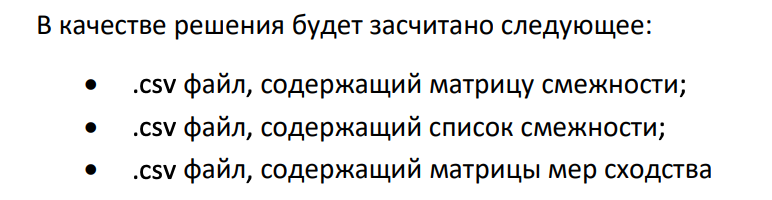

In [33]:
pd_matrix.to_csv('csv/adjacency_matrix.csv')

In [34]:
import csv

with open("csv/adjacency_list.csv", 'w', newline='') as write_file:
    writer = csv.writer(write_file, delimiter=',')
    writer.writerow(['-'] * len(g_matrix))
    for node in g_list:
        cur_list = [node]
        for adjacent_node in g_list[node]:
            cur_list.append(adjacent_node)
        writer.writerow(cur_list)

In [35]:
common_neighbours_similarity_matrix.to_csv('csv/common_neighbours_similarity.csv')
jaccard_similarity_matrix.to_csv('csv/jaccard_similarity_matrix.csv')
frequency_common_neighbors_similarity_matrix.to_csv('csv/frequency_common_neighbors_similarity_matrix.csv')
preferential_attachment_similarity_matrix.to_csv('csv/preferential_attachment_similarity_matrix.csv')